In [1]:
% matplotlib inline
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('train.csv')

FileNotFoundError: ignored

In [ ]:
!pip install pandas_profiling==3.2.0

In [ ]:
!pip install MarkupSafe==2.0.1

In [ ]:
from pandas_profiling import ProfileReport

In [ ]:
profile = ProfileReport(df)

In [ ]:
profile.to_file('titanic.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# filling missing values

In [ ]:
df.Age.fillna(df.Age.mean(), inplace=True)

In [ ]:
df.Embarked.fillna('S', inplace=True)

In [ ]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [ ]:
df.shape

(891, 12)

# handle categoricals

In [ ]:
df = pd.get_dummies(df, columns=['Pclass', 'Sex', 'Embarked'], drop_first=True)

In [ ]:
df.shape

(891, 14)

In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Pclass_2', 'Pclass_3', 'Sex_male', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression()

In [ ]:
from sklearn.model_selection import cross_val_predict, cross_val_score

In [ ]:
train_cols = ['Age','SibSp','Parch','Fare',
              'Pclass_2', 'Pclass_3', 'Sex_male', 'Embarked_Q','Embarked_S']
test_col = 'Survived'

In [ ]:
cross_val_score(lr, df[train_cols], df[test_col], cv=5)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

array([0.79329609, 0.80446927, 0.78651685, 0.76404494, 0.82485876])

In [ ]:
lr.fit(df[train_cols], df[test_col])

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
probs = lr.predict_proba(df[train_cols])

In [ ]:
psur = probs[:,1]

In [ ]:
preds = lr.predict(df[train_cols])

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve, precision_score, recall_score

In [ ]:
precision_score(df['Survived'], preds), recall_score(df['Survived'], preds)

(0.7892976588628763, 0.6900584795321637)

In [ ]:
roc_auc_score(df['Survived'], psur)

0.8557904323650657

In [ ]:
fpr, tpr, thresholds = roc_curve(df['Survived'], psur)

In [ ]:
import matplotlib.pyplot as plt

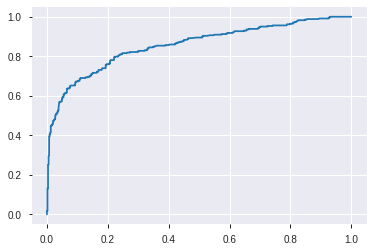

In [ ]:
plt.plot(fpr, tpr)
plt.show()